<h1 style = 'color: Orange; text-align:center; font-weight: bold'>Feature Extraction and Selection </h1>

<p style = 'text-align:center'>In this final file we will try to reduce the dimesions or create new meaningful features for our data</p>

In [131]:
## Loading df and all_df dataframes
import pandas as pd
import pickle
import Functions as f 
old_df = pd.read_pickle('PickleCleaning.pkl')   ## for making decisions
df = pd.read_pickle('model_with_all_features.pkl')  ## Original dataset
print(df.shape)
print(old_df.shape)

(2908, 187)
(2908, 80)


In [132]:
df

,LotFrontage,LotArea,Alley,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,__Heating_Wall,__GarageType_Attchd,__GarageType_Basment,__GarageType_BuiltIn,__GarageType_Detchd,__GarageType_No Garage,__GarageType_Other,__MiscFeature_None,__MiscFeature_Other,__MiscFeature_Shed
0,4.189655,9.042040,0,7,5,5.283204,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.394449,9.169623,0,6,8,0.000000,3,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.234107,9.328212,0,7,5,5.093750,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.110874,9.164401,0,7,5,0.000000,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4.442651,9.565284,0,8,5,5.860786,4,3,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,4.454347,8.976894,0,4,7,4.787492,3,3,4,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2904,4.204693,9.486152,0,4,5,0.000000,3,3,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2905,4.234107,9.109746,0,5,7,0.000000,3,3,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2906,4.330733,9.181735,0,5,5,0.000000,3,3,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [133]:
[col for col in df.columns if "Garage" in col]

['GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 '__GarageType_Attchd',
 '__GarageType_Basment',
 '__GarageType_BuiltIn',
 '__GarageType_Detchd',
 '__GarageType_No Garage',
 '__GarageType_Other']

With <code>old_df</code> i will analyze which columns should be delete or modify and in <code>df</code> will apply the changes

first let's analyze Exterior Columns since that the only column i remeber that can be reduced

In [134]:
old_df[['Exterior1st', 'Exterior2nd']]

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
...,...,...
1454,CemntBd,CmentBd
1455,CemntBd,CmentBd
1456,VinylSd,VinylSd
1457,HdBoard,Wd Shng


In [135]:
old_df['Exterior1st'].reset_index()

,index,Exterior1st
0,0,VinylSd
1,1,MetalSd
2,2,VinylSd
3,3,Wd Sdng
4,4,VinylSd
...,...,...
2903,1454,CemntBd
2904,1455,CemntBd
2905,1456,VinylSd
2906,1457,HdBoard


In this column i found a pattern that can be see by below code

In [136]:
old_df.reset_index(drop=True, inplace=True)


In [137]:
Exteriors_df = pd.crosstab(old_df['Exterior1st'], old_df['Exterior2nd'])
Exteriors_df

Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,35,0,0,0,0,1,0,0,0,0,5,0,1,0,1,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,4,0,0,0,0,0,0,0,0,0,1,0,1,0
BrkFace,1,0,0,43,0,0,3,0,3,0,8,3,3,1,20,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
CemntBd,0,0,0,0,0,124,0,0,0,0,0,0,0,0,1,1
HdBoard,0,1,0,1,0,0,383,6,1,0,41,0,1,0,3,5
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,3,0,437,0,0,0,3,2,2,1


Here the pattern can be notice is that each unique value of Exterior's is intercepting mostly with it's column that makes present of both colmn near to unsesable (sorry for english) that can be visualzize a differnt way also

<Axes: xlabel='Exterior2nd', ylabel='Exterior2nd'>

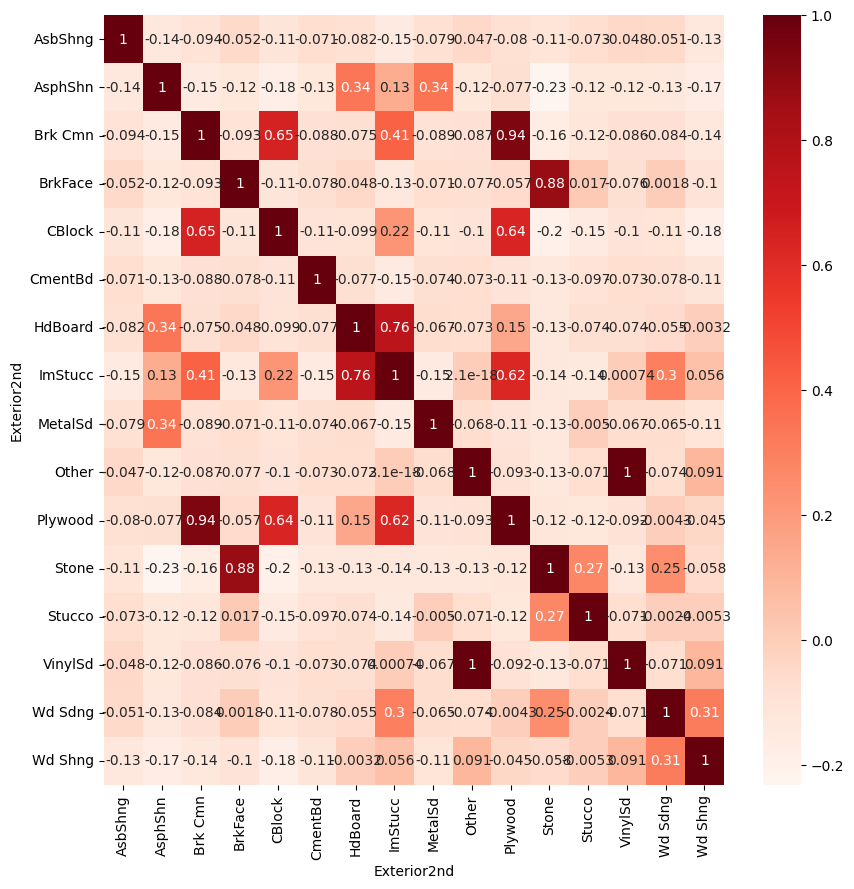

In [138]:
## plotting correlation matrix for that
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 10))
sns.heatmap(Exteriors_df.corr(), annot = True, cmap = 'Reds')

In [139]:
df.shape

(2908, 187)

Here is the corelation matrix that shows that Exterior 1st and Exterior 2nd are almost representing same data so Exterior1st , Exterior2nd can be selected as a single column <code>Exteriors</code>

In [140]:
print(f.find_columns(df,['Exterior1st', 'Exterior2nd']))
df.drop(f.find_columns(df,['Exterior1st', 'Exterior2nd']), axis = 1, inplace = True)
df.shape


['__Exterior1st_BrkFace', '__Exterior1st_CemntBd', '__Exterior1st_HdBoard', '__Exterior1st_MetalSd', '__Exterior1st_Other', '__Exterior1st_Plywood', '__Exterior1st_VinylSd', '__Exterior1st_Wd Sdng', '__Exterior1st_WdShing', '__Exterior2nd_CmentBd', '__Exterior2nd_HdBoard', '__Exterior2nd_MetalSd', '__Exterior2nd_Other', '__Exterior2nd_Plywood', '__Exterior2nd_VinylSd', '__Exterior2nd_Wd Sdng', '__Exterior2nd_Wd Shng']


(2908, 170)

In [141]:
## Adding Exterior column
df['Exterior'] = old_df['Exterior1st']
print(df['Exterior'].value_counts())
df.shape

Exterior
VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     407
Plywood     219
CemntBd     126
BrkFace      86
WdShing      56
AsbShng      43
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64


(2908, 171)

Introductin others for this where it's less than 50

In [142]:
## importing function file for using the other file
f.introduce_other(df, 'Exterior', 50)
print(df['Exterior'].value_counts())

Exterior
VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     407
Plywood     219
CemntBd     126
Other        99
BrkFace      86
WdShing      56
Name: count, dtype: int64


In [143]:
f.find_columns(df, ['Exterio'])

['Exterior']

In [144]:
## applying OHE on this column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
encoded_exterior = encoder.fit_transform(df[['Exterior']])
encoded_exterior_df = pd.DataFrame(encoded_exterior, columns= encoder.get_feature_names_out())

## appending this df to main df
df = pd.concat([df, encoded_exterior_df ], axis = 1)
df.drop('Exterior', axis = 1, inplace = True)
df.shape

(2908, 179)

Checking Garage columns since they may very corelated

In [145]:
garage_cols = [col for col in old_df.columns if "Garage" in col]
old_df[garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA
...,...,...,...,...,...,...,...
2903,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage
2904,CarPort,1970.0,Unf,1.0,286.0,TA,TA
2905,Detchd,1960.0,Unf,2.0,576.0,TA,TA
2906,No Garage,0.0,No Garage,0.0,0.0,No Garage,No Garage


In [146]:
## Let's first create a crosstab for GarageQual and GarageCond to see the relation
pd.crosstab(old_df['GarageQual'], old_df['GarageCond'])

GarageCond,Ex,Fa,Gd,No Garage,Po,TA
GarageQual,,,,,,
Ex,2,0,0,0,0,1
Fa,0,38,0,0,7,77
Gd,1,0,6,0,0,17
No Garage,0,0,0,157,0,0
Po,0,1,0,0,4,0
TA,0,33,9,0,2,2553


From above metrix it is very much clear that i can remove any one of the Feature. So am removing Garage Cond because that does'nt make very importing sound

In [147]:
print(df.shape)
df.drop('GarageCond', axis = 1, inplace = True)
df.shape

(2908, 179)


(2908, 178)

Now if we look then <code>GarageCars</code> is like a gimmy column when we have <code>GarageArea</code> then why do we need how many cars can fit into that. So removing GarageCars column too.

In [148]:
df.drop('GarageCars', axis = 1, inplace = True)
df.shape

(2908, 177)

For GarageType, GarageYrBuilt, GarageFinish i will create a new column based on condition<br>
<li><code>Modern Finished Garage:</code> Built after 2000 and has a Fin finish.</li>
<li><code>Modern Unfinished Garage:</code>  Built after 2000 but has Unf or RFn finish.</li>
<li><code>Old Finished Garage:</code>  Built before 2000 with a Fin finish.</li>
<li><code>Old Unfinished Garage:</code>  Built before 2000 with Unf or RFn finish.</li>
<li><code>No Garage.</code> <br>
after that will train data with new category and the old one and will see which is performing better

In [149]:
df[f.find_columns(df, ['Garage'])]

,GarageYrBlt,GarageFinish,GarageArea,GarageQual,__GarageType_Attchd,__GarageType_Basment,__GarageType_BuiltIn,__GarageType_Detchd,__GarageType_No Garage,__GarageType_Other
0,2003.0,2,6.308098,3,1.0,0.0,0.0,0.0,0.0,0.0
1,1976.0,2,6.133398,3,1.0,0.0,0.0,0.0,0.0,0.0
2,2001.0,2,6.411818,3,1.0,0.0,0.0,0.0,0.0,0.0
3,1998.0,1,6.466145,3,0.0,0.0,0.0,1.0,0.0,0.0
4,2000.0,2,6.729824,3,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2903,0.0,0,6.133398,0,0.0,0.0,0.0,0.0,1.0,0.0
2904,1970.0,1,6.216606,3,0.0,0.0,0.0,0.0,0.0,1.0
2905,1960.0,1,5.533389,3,0.0,0.0,0.0,1.0,0.0,0.0
2906,0.0,0,5.484797,0,0.0,0.0,0.0,0.0,1.0,0.0


In [150]:
# Define a function to categorize garages
def categorize_garage(row):
    if row['GarageType'] == 'No Garage':
        return 'No Garage'
    elif row['GarageYrBlt'] > 2000:
        if row['GarageFinish'] == 'Fin':
            return 'Modern Finished Garage'
        elif row['GarageFinish'] in ['Unf', 'RFn']:
            return 'Modern Unfinished Garage'
    elif row['GarageYrBlt'] <= 2000:
        if row['GarageFinish'] == 'Fin':
            return 'Old Finished Garage'
        elif row['GarageFinish'] in ['Unf', 'RFn']:
            return 'Old Unfinished Garage'
    return 'Unknown'  # Fallback for unexpected cases

# Apply the function to create the new column
df['GarageRating'] = old_df.apply(categorize_garage, axis=1)

In [151]:
## Now adding Label Encoding For GarageRating Column
df['GarageRating'] = df['GarageRating'].map(
    {
        'Modern Finished Garage': 4,
        'Modern Unfinished Garage': 3,
        'Old Finished Garage': 2,
        'Old Unfinished Garage': 1,
        'No Garage': 0,
        'Unknown': 0
    }
)

df['GarageRating'].value_counts()

GarageRating
1    1651
3     382
4     370
2     348
0     157
Name: count, dtype: int64

In [152]:
f.find_columns(df, ['GarageType', 'GarageYrBlt', 'GarageFinish'])

['GarageYrBlt',
 'GarageFinish',
 '__GarageType_Attchd',
 '__GarageType_Basment',
 '__GarageType_BuiltIn',
 '__GarageType_Detchd',
 '__GarageType_No Garage',
 '__GarageType_Other']

Now creating two database one with Garage columns one with only GarageRating column

In [153]:
Garage_rating_df = df.drop(f.find_columns(df, ['GarageType', 'GarageYrBlt', 'GarageFinish']), axis = 1)  ## contains GarageRating only
No_Garage_rating_df = df.drop('GarageRating', axis = 1) ## Does not contain GarageRating

In [154]:
Garage_rating_df.shape

(2908, 170)

In [155]:
No_Garage_rating_df.shape

(2908, 177)

In [156]:
# Adding SalePrice into my main data for further splitting process
df['SalePrice'] = old_df['SalePrice']

In [157]:
## splitting both df in train and test set
from sklearn.model_selection import train_test_split

## Splitting Data For Garage Rating containing Df
X_train_no_garage, X_test_no_garage, Y_train_no_garage, Y_test_no_garage = train_test_split(Garage_rating_df.drop('SalePrice', axis = 1), Garage_rating_df.SalePrice, test_size = 0.2)

## Splitting Data for contining Garage Data (not Garage Rating)
X_train_garage, X_test_garage, Y_train_garage, Y_test_garage = train_test_split(No_Garage_rating_df.drop('SalePrice', axis = 1), No_Garage_rating_df.SalePrice, test_size = 0.2)

In [158]:
X_train_garage.shape

(2326, 176)

In [159]:
X_train_no_garage.shape

(2326, 169)

In [160]:
## creating function for scaling
from sklearn.preprocessing import StandardScaler
def scaling_data(X_train, X_test):
    ss = StandardScaler()
    x_train_scaled = ss.fit_transform(X_train)
    x_test_scaled = ss.transform(X_test)
    x_train = pd.DataFrame(x_train_scaled , columns= X_train.columns)
    x_test = pd.DataFrame(x_test_scaled , columns = X_test.columns)
    return x_train , x_test

In [161]:
## scaling data
X_train_garage, X_test_garage = scaling_data(X_train_garage , X_test_garage) 
X_train_no_garage , X_test_no_garage = scaling_data(X_train_no_garage , X_test_no_garage)

In [ ]:
## training the data and get accuracy
## Importing Models to check for accuracy
# Import popular regression models
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}
X , Y = df.drop('SalePrice', axis = 1), df.SalePrice

## transforming X 
X_trans = StandardScaler().fit_transform(X)
X = pd.DataFrame(X , columns= X.columns)
# Evaluation metrics for regression
from sklearn.metrics import root_mean_squared_error as rmse, r2_score
from sklearn.model_selection import cross_val_score

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        ## doing cross validation
        cv_score = np.mean(cross_val_score(model, X , Y, cv = 5))
        
        # Calculate metrics
        rmse_train = rmse(y_train, y_pred_train)
        rmse_test = rmse(y_test, y_pred_test)
        R2_train = r2_score(y_train, y_pred_train)
        R2_test = r2_score(y_test, y_pred_test)
        
        results[name] = {
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'R2_train' : R2_train,
            'R2_test': R2_test,
            'cross_val_score': cv_score
        }
    print(X.shape)
    
    return pd.DataFrame(results).T

# Evaluate all models for with Garage column
# results = evaluate_models(models, X_train_garage, X_test_garage, Y_train_garage, Y_test_garage)
# results


,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,37434.520162,5.273677e+15,0.781631,-5.200726e+21,0.714875
Decision Tree,109.961691,2.328669e+04,0.999998,8.985966e-01,0.938669
Random Forest,8998.312768,2.109951e+04,0.987383,9.167505e-01,0.937445
Gradient Boosting,19635.811083,2.391192e+04,0.939918,8.930783e-01,0.906232


In [ ]:
# # Now checking accuracy on garageRating df
# evaluate_models(models, X_train_no_garage, X_test_no_garage, Y_train_no_garage, Y_test_no_garage)

,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,35780.920348,44549.736506,0.775998,0.755803,0.714875
Decision Tree,109.961691,29907.605319,0.999998,0.889944,0.934044
Random Forest,8700.997694,23865.569760,0.986754,0.929920,0.939952
Gradient Boosting,19492.124362,24300.459096,0.933524,0.927343,0.906462


If we compare then it shows that accuracy is quite neglible in both the dataseset so choosing the data with less feature means <code>df with GarageRating feature </code>

In [164]:
df = Garage_rating_df
df.shape

(2908, 170)

In [165]:
## checking Bsmt Features
old_df[f.find_columns(old_df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
3,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
4,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2903,Gd,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,0.0,0.0
2904,Gd,TA,No,ALQ,252.0,Rec,0.0,294.0,546.0,0.0,0.0
2905,TA,Gd,No,GLQ,1224.0,Unf,0.0,0.0,1224.0,1.0,0.0
2906,TA,TA,Mn,GLQ,337.0,Rec,0.0,575.0,912.0,0.0,1.0


clearly we can see TotalBsmtSf is nothing but BsmtFinSF1 + BsmtFinSF2+ BsmtUnfSF so removing these 2 columns and consider TotalBsmtSF only

In [166]:
df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1, inplace = True)

In [167]:
df[f.find_columns(df, ['Bsmt'])]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,4,3,1,6,1,6.753438,1.0,0.0
1,4,3,4,5,1,7.141245,0.0,1.0
2,4,3,2,6,1,6.825460,1.0,0.0
3,3,4,1,5,1,6.629363,1.0,0.0
4,4,3,3,6,1,7.044033,1.0,0.0
...,...,...,...,...,...,...,...,...
2903,4,3,1,1,1,6.860664,0.0,0.0
2904,4,3,1,5,3,7.341484,0.0,0.0
2905,3,4,1,6,1,7.050123,1.0,0.0
2906,3,3,2,6,3,6.983790,0.0,1.0


In [168]:
df['BsmtFullBath'].value_counts()

BsmtFullBath
0.0    1698
1.0    1170
2.0      38
3.0       2
Name: count, dtype: int64

Now here BsmtFinSF1, BsmtUnSF and BsmtFinSF2 are removed.

In [169]:
print(old_df['BsmtHalfBath'].value_counts())
print(df['BsmtFullBath'].value_counts())

## creating this binary column
df['BsmtHalfBath'] = df['BsmtHalfBath'].map(lambda x: 1 if x != 0 else 0)
df['BsmtFullBath'] = df['BsmtFullBath'].map(lambda x: 1 if x != 0 else 0)
df['BsmtHalfBath'].value_counts()
df['BsmtFullBath'].value_counts()

BsmtHalfBath
0.0    2733
1.0     171
2.0       4
Name: count, dtype: int64
BsmtFullBath
0.0    1698
1.0    1170
2.0      38
3.0       2
Name: count, dtype: int64


BsmtFullBath
0    1698
1    1210
Name: count, dtype: int64

Now BsmtQual -> Height of Bsmt<br>
    BsmtCond -> Cond of Bsmt<br>
    BsmtExposure -> Exposure of Bsmt<br>
    BsmtFinType1 -> Rating of finsihed Area<br>
    BsmtFinType2 -> ................<br>
    BsmtFullBath -> Bathrooms in Bsmt<br>
    BsmtHalfBath -> Half baths in Bsmt<br>

<b style = 'color: green'>Plan to Deal</b><br>
Will create one column only that will represent essence of these features as Bsmt Rating<br>
If BsmtCond in (2, 5) & BsmtFullBath With BsmtHalfBathPresent then 7<br>
else if Bsmt in (2, 5) With BsmtFullBath then 6<br>
else if Bsmt in (2, 5) Without BsmtFullBath But BsmtHalfBath then 5<br>
else if Bsmt in (2, 5) Without Any Bath then 4<br>
else if Bsmt (0, 1) With BsmtFull and HalfBath then 3<br>
else if Bsmt in (0,1) Without BsmtFull or HalfBath then 2<br>
else 1

In [170]:
def categorize_Bsmt(row):
    if (row['BsmtCond'] in (2, 5)) and (row['BsmtFullBath'] == 1) and (row['BsmtHalfBath'] == 1):
        return 7
    elif (row['BsmtCond'] in (2, 5)) and (row['BsmtFullBath'] == 1) and (row['BsmtHalfBath'] == 0):
        return 6
    elif (row['BsmtCond'] in (2, 5)) and (row['BsmtFullBath'] == 0) and (row['BsmtHalfBath'] == 1):
        return 5
    elif (row['BsmtCond'] in (2, 5)) and (row['BsmtFullBath'] == 0) and (row['BsmtHalfBath'] == 0):
        return 4
    elif (row['BsmtCond'] in (0, 1)) and (row['BsmtFullBath'] == 1) and (row['BsmtHalfBath'] == 1):
        return 3
    elif (row['BsmtCond'] in (0, 1)) and ((row['BsmtFullBath'] == 1) or (row['BsmtHalfBath'] == 1)):
        return 2
    else:
        return 1

# Apply the function
df['BsmtRating'] = df.apply(categorize_Bsmt, axis=1)

# Get value counts
print(df['BsmtRating'].value_counts())


BsmtRating
1    2807
4      61
6      22
2      12
5       5
7       1
Name: count, dtype: int64


In [171]:
## Deleting rest columns
df.drop(['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond'], axis = 1, inplace = True)
df.shape

(2908, 161)

Now Features are only 161. Let's again train and test the result

In [ ]:
## Step 1 - Splitting the data
X_train , X_test, Y_train, Y_test = train_test_split(df.drop('SalePrice', axis = 1), df.SalePrice, test_size = 0.3)

## Step 2 - Scaling the data
X_train , X_test = scaling_data(X_train , X_test)

## Step 3 - Calculating Accuracy

evaluate_models(models, X_train, X_test, Y_train, Y_test)

,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,41573.183334,1.184718e+17,0.719832,-2.229001e+24,0.714875
Decision Tree,117.561213,3.816268e+04,0.999998,7.687093e-01,0.938289
Random Forest,10840.242959,2.691447e+04,0.980951,8.849592e-01,0.939216
Gradient Boosting,22522.407353,2.967482e+04,0.917772,8.601518e-01,0.906132


Clearly Accuracy is quite same so choosing this data for further process

In [173]:
## Checking PoolQC
df.PoolQC.value_counts()

PoolQC
0    2894
1      14
Name: count, dtype: int64

In [174]:
df['PoolArea'].value_counts()

PoolArea
0.000000    2894
6.240276       2
6.475433       2
6.357842       2
6.320768       2
6.175867       2
6.253829       2
6.605298       2
Name: count, dtype: int64

In [175]:
df[['PoolArea', 'SalePrice']].corr()

,PoolArea,SalePrice
PoolArea,1.000000,0.094716
SalePrice,0.094716,1.000000


Due to less variability <code>PoolQC</code> and <code>PoolArea</code> can be deleted

In [176]:
df.drop(['PoolQC', 'PoolArea'], axis = 1, inplace = True)
df.shape

(2908, 159)

Dealing With Condition Column

In [177]:
pd.crosstab(old_df['Condition1'], old_df['Condition2'])

Condition2,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
Condition1,,,,,,,,
Artery,2,0,88,1,0,0,0,0
Feedr,1,4,152,0,0,1,1,2
Norm,0,0,2504,0,0,0,0,0
PosA,0,0,17,3,0,0,0,0
PosN,0,0,35,0,4,0,0,0
RRAe,0,0,28,0,0,0,0,0
RRAn,1,8,41,0,0,0,0,0
RRNe,0,0,6,0,0,0,0,0
RRNn,1,1,7,0,0,0,0,0


In [178]:
print(old_df.Condition2.value_counts())
print(old_df.Condition1.value_counts())

Condition2
Norm      2878
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: count, dtype: int64
Condition1
Norm      2504
Feedr      161
Artery      91
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64


Since For Condition 2 Data is biased for Norm So creating other column for rest of Norm

In [179]:
df['Condition2'] = old_df['Condition2']

## introducing other for that
f.introduce_other(df, 'Condition2', 2000)

## confirming transformation
df['Condition2'].value_counts()

Condition2
Norm     2878
Other      30
Name: count, dtype: int64

In [180]:
## Removing All ohe columns of Condition2 in main-df
remove_col = f.find_columns(df, ['Condition2'])
remove_col = remove_col[:-1]
df.drop(remove_col, axis = 1, inplace = True)
df.shape

(2908, 152)

In [181]:
## Adding our new Condition2 columns for that
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
transformed_condition2 = ohe.fit_transform(df[['Condition2']])
df = pd.concat((df, pd.DataFrame(transformed_condition2, columns = ohe.get_feature_names_out())), axis = 1)
df.drop('Condition2', axis = 1, inplace = True)  ## Dropping original one
df.shape

(2908, 153)

## Again Checking Accuracy

In [ ]:
# ## Step 1 - Splitting the data
# X_train , X_test, Y_train, Y_test = train_test_split(df.drop('SalePrice', axis = 1), df.SalePrice, test_size = 0.3, random_state = 42)

# ## Step 2 - Scaling the data
# X_train , X_test = scaling_data(X_train , X_test)

# ## Step 3 - Calculating Accuracy

# evaluate_models(models, X_train, X_test, Y_train, Y_test)

,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,42850.085333,42259.064362,0.714180,0.686385,0.714875
Decision Tree,0.000000,39642.549898,1.000000,0.724018,0.937059
Random Forest,10619.861965,26440.206123,0.982444,0.877231,0.938553
Gradient Boosting,22481.974060,28504.201941,0.921321,0.857316,0.906358


So We got another model which is little bit better than preivous model and with less feature

Checking OverallCond and OverallQual

In [183]:
df[['OverallCond', 'OverallQual']]

,OverallCond,OverallQual
0,5,7
1,8,6
2,5,7
3,5,7
4,5,8
...,...,...
2903,7,4
2904,5,4
2905,7,5
2906,5,5


In [184]:
## dropping overall Qual by reading it from description file 
df.drop('OverallQual', axis = 1, inplace = True)

## Similiarly dropping ExterQual also
df.drop('ExterQual', axis = 1, inplace = True)

1stFlrSF: First Floor square feet<br>
 
2ndFlrSF: Second floor square feet <br>

LowQualFinSF: Low quality finished square feet (all floors) <br>

GrLivArea: Above grade (ground) living area square feet<br>

Creating New column as TotalFlrSF

In [185]:
df['TotalFlrSF'] = df['1stFlrSF']+df['2ndFlrSF']+df['LowQualFinSF']+df['GrLivArea']
df[['1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotalFlrSF']]

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotalFlrSF
0,6.753438,6.751101,0.0,7.444833,20.949373
1,7.141245,0.000000,0.0,7.141245,14.282490
2,6.825460,6.765039,0.0,7.488294,21.078793
3,6.869014,6.629363,0.0,7.448916,20.947294
4,7.044033,6.960348,0.0,7.695758,21.700139
...,...,...,...,...,...
2903,6.860664,6.543912,0.0,7.407318,20.811893
2904,7.637234,0.000000,0.0,7.637234,15.274469
2905,7.080868,7.050123,0.0,7.758333,21.889324
2906,6.983790,0.000000,0.0,6.983790,13.967580


It's look correct calculation now removing other columns

In [186]:
df.drop(['1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], axis = 1, inplace = True)
df.shape

(2908, 148)

WoodDeckSF: Wood deck area in square feet<br>

OpenPorchSF: Open porch area in square feet<br>

EnclosedPorch: Enclosed porch area in square feet<br>

3SsnPorch: Three season porch area in square feet<br>

ScreenPorch: Screen porch area in square feet<br>

creating new column as <code>TotalPorchDeckSF</code> which will be some of all the areas

In [187]:
df['TotalPorchDeckSF'] = (df['WoodDeckSF'] + 
                          df['OpenPorchSF'] + 
                          df['EnclosedPorch'] + 
                          df['3SsnPorch'] + 
                          df['ScreenPorch'])

test_df = df.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1)
test_df.shape


(2908, 144)

## Checking Accuracy

In [188]:
## Step 1 - Splitting the data
X_train , X_test, Y_train, Y_test = train_test_split(test_df.drop('SalePrice', axis = 1), test_df.SalePrice, test_size = 0.3, random_state = 42)

## Step 2 - Scaling the data
X_train , X_test = scaling_data(X_train , X_test)

## Step 3 - Calculating Accuracy

evaluate_models(models, X_train, X_test, Y_train, Y_test)

,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,48883.866664,47922.991971,0.628019,0.596684,0.714875
Decision Tree,0.000000,36931.262287,1.000000,0.760478,0.936393
Random Forest,11403.932715,28145.934182,0.979756,0.860880,0.938528
Gradient Boosting,24313.704452,29055.680980,0.907978,0.851741,0.906441


In [189]:
## trying with other feature also
df['CoveredPorchSF'] = df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['OpenPorchDeckSF'] = df['WoodDeckSF'] + df['OpenPorchSF']

test_df = df.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalPorchDeckSF'], axis = 1)
test_df.shape


(2908, 145)

In [ ]:
# ## Step 1 - Splitting the data
# X_train , X_test, Y_train, Y_test = train_test_split(test_df.drop('SalePrice', axis = 1), test_df.SalePrice, test_size = 0.3, random_state = 42)

# ## Step 2 - Scaling the data
# X_train , X_test = scaling_data(X_train , X_test)

# ## Step 3 - Calculating Accuracy

# evaluate_models(models, X_train, X_test, Y_train, Y_test)

,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,48143.334959,47774.890176,0.639204,0.599173,0.714875
Decision Tree,0.000000,39207.010976,1.000000,0.730049,0.934406
Random Forest,11080.781113,27691.994249,0.980887,0.865331,0.939174
Gradient Boosting,23948.252174,29255.975572,0.910723,0.849690,0.906346


Here we can see with less features also accuracy increased little bit and it looks like df with having <code>CoveredPorchSF, OpenPorchDeckSF</code> these features making more sense for the target column so taking this df only

In [191]:
df.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalPorchDeckSF'], axis = 1, inplace = True)
df.shape

(2908, 145)

In [192]:
## Now will test by removing some featues that i think may not very
## useful for predicting target and accuracy then

test_df = df.drop(['PavedDrive', 'MiscVal', 'Fireplaces'], axis = 1)
test_df.drop(f.find_columns(test_df, ['Neighb', 'LotConfi']), axis = 1, inplace = True)
test_df.shape

(2908, 113)

In [ ]:
# ## Step 1 - Splitting the data
# X_train , X_test, Y_train, Y_test = train_test_split(test_df.drop('SalePrice', axis = 1), test_df.SalePrice, test_size = 0.3, random_state = 42)

# ## Step 2 - Scaling the data
# X_train , X_test = scaling_data(X_train , X_test)

# ## Step 3 - Calculating Accuracy

# evaluate_models(models, X_train, X_test, Y_train, Y_test)

,rmse_train,rmse_test,R2_train,R2_test,cross_val_score
Linear Regression,49471.027616,47532.574719,0.619029,0.603229,0.714875
Decision Tree,0.000000,38324.873609,1.000000,0.742060,0.936354
Random Forest,11009.945019,27908.878285,0.981131,0.863214,0.939379
Gradient Boosting,24115.775644,28870.986582,0.909470,0.853620,0.906195


After removing plenty of columns accuracy is still the same so for now we will use this much featured data

In [194]:
df.drop(['PavedDrive', 'MiscVal', 'Fireplaces'], axis = 1, inplace = True)
df.drop(f.find_columns(df, ['Neighb', 'LotConfi']), axis = 1, inplace= True)

In [195]:
df.shape

(2908, 113)

 Though out the accuracy checking process <code>Decision tree</code> and <code>Random Forest</code> have shown maximum accuracy so now considering them only and try to find best parameters for them

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X , Y = df.drop('SalePrice', axis = 1), df.SalePrice

# Initialize Decision Tree
dt = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ["squared_error", 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X, Y)  # Replace X and y with your dataset

# Best parameters
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy Found", grid_search_dt.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy Found 0.5450656824647633
